In [1]:
import scanpy
import scprep
import phate
import numpy as np
import graphtools
import seaborn as sns
import pandas as pd

In [233]:
scanpy.set_figure_params(dpi_save=300)

In [2]:
adata = scanpy.read_h5ad('data/all_exocrine_endocrine_processed.h5ad')

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [170]:
marker_list = {
    "beta": ["Ins1", "Ins2"],
    "delta": ["Sst"],
    "γ (PP)":["Ppy"],
    "alpha":["Gcg"],
    "ductal": ["Sox9", "Hnf1b", "Muc1", "Krt19"],
    "endothelial": ['Pecam1', 'Plvap'],
    "acinar": ['Cpa1', 'Prss2'],
    "immune": ['Cd52', 'Ptprc'],
    'stellate-activated': ['Col1a2', 'Bicc1', 'Pdgfra'],
    'stellate-quiescent': ['Ndufa4l2', 'Acta2', 'Cspg4', 'Rgs5'],
    "epsilon": ['Ghrl'],
    'Schwann': ['Cryab', 'Plp1']
}

In [19]:
clustering = phate.cluster.kmeans(phate_op, n_clusters=20, random_state=42)
adata.obs['clusters'] = pd.Series(clustering, index=adata.obs_names).astype('category')
cmap = [lighten_color(x, amount=1.1) for x in sns.color_palette('tab10', n_colors=10)] + \
[lighten_color(x) for x in sns.color_palette('tab10', n_colors=10)]

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

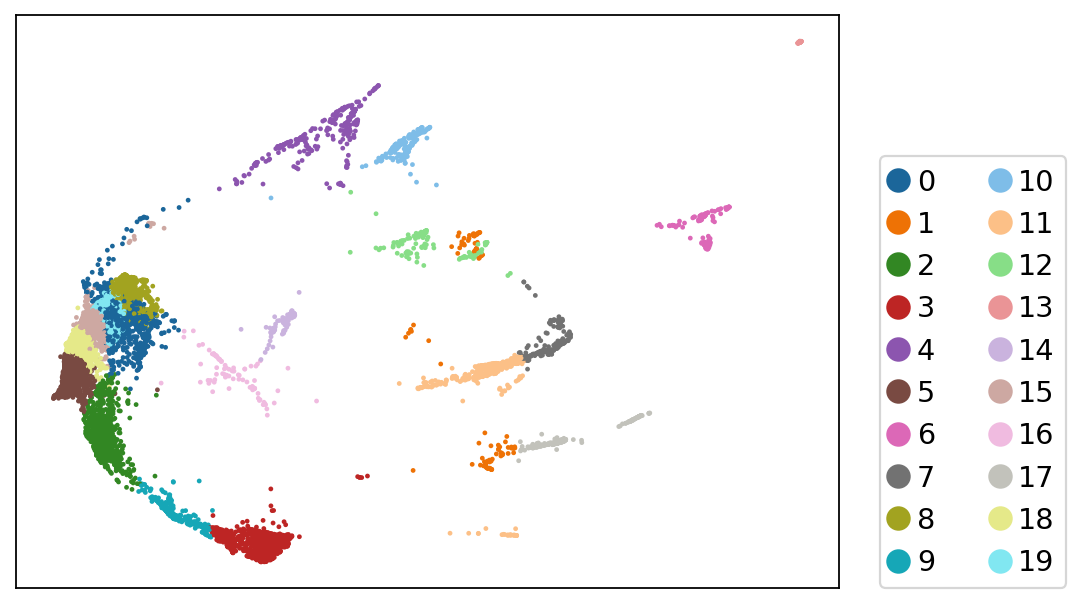

In [242]:
scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['clusters'], legend_loc=(1.05, 0), ticks=None,
                      figsize=(7,4), cmap=cmap, filename='figures/endocrine_exocrine_cells_clusters.png', dpi=300)

In [71]:
adata.var["mt"] = adata.var['names'].str.startswith("mt-")
scanpy.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

/tmp/ipykernel_132673/512320218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adata.obs, x=adata.obs['clusters'], y=adata.obs['log1p_n_genes_by_counts'], palette=cmap)


<Axes: xlabel='clusters', ylabel='log1p_n_genes_by_counts'>

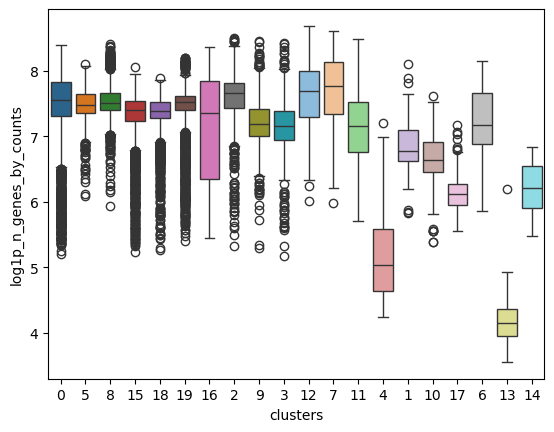

In [230]:
sns.boxplot(data=adata.obs, x=adata.obs['clusters'], y=adata.obs['log1p_n_genes_by_counts'], palette=cmap)

In [231]:
adata.obs['clusters'] = pd.Categorical(clustering, ordered=True, categories=[0, 5, 8, 15, 18, 19, 16, 2, 9, 3, 12, 7, 11, 4, 1, 10, 17, 6, 13, 14])

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


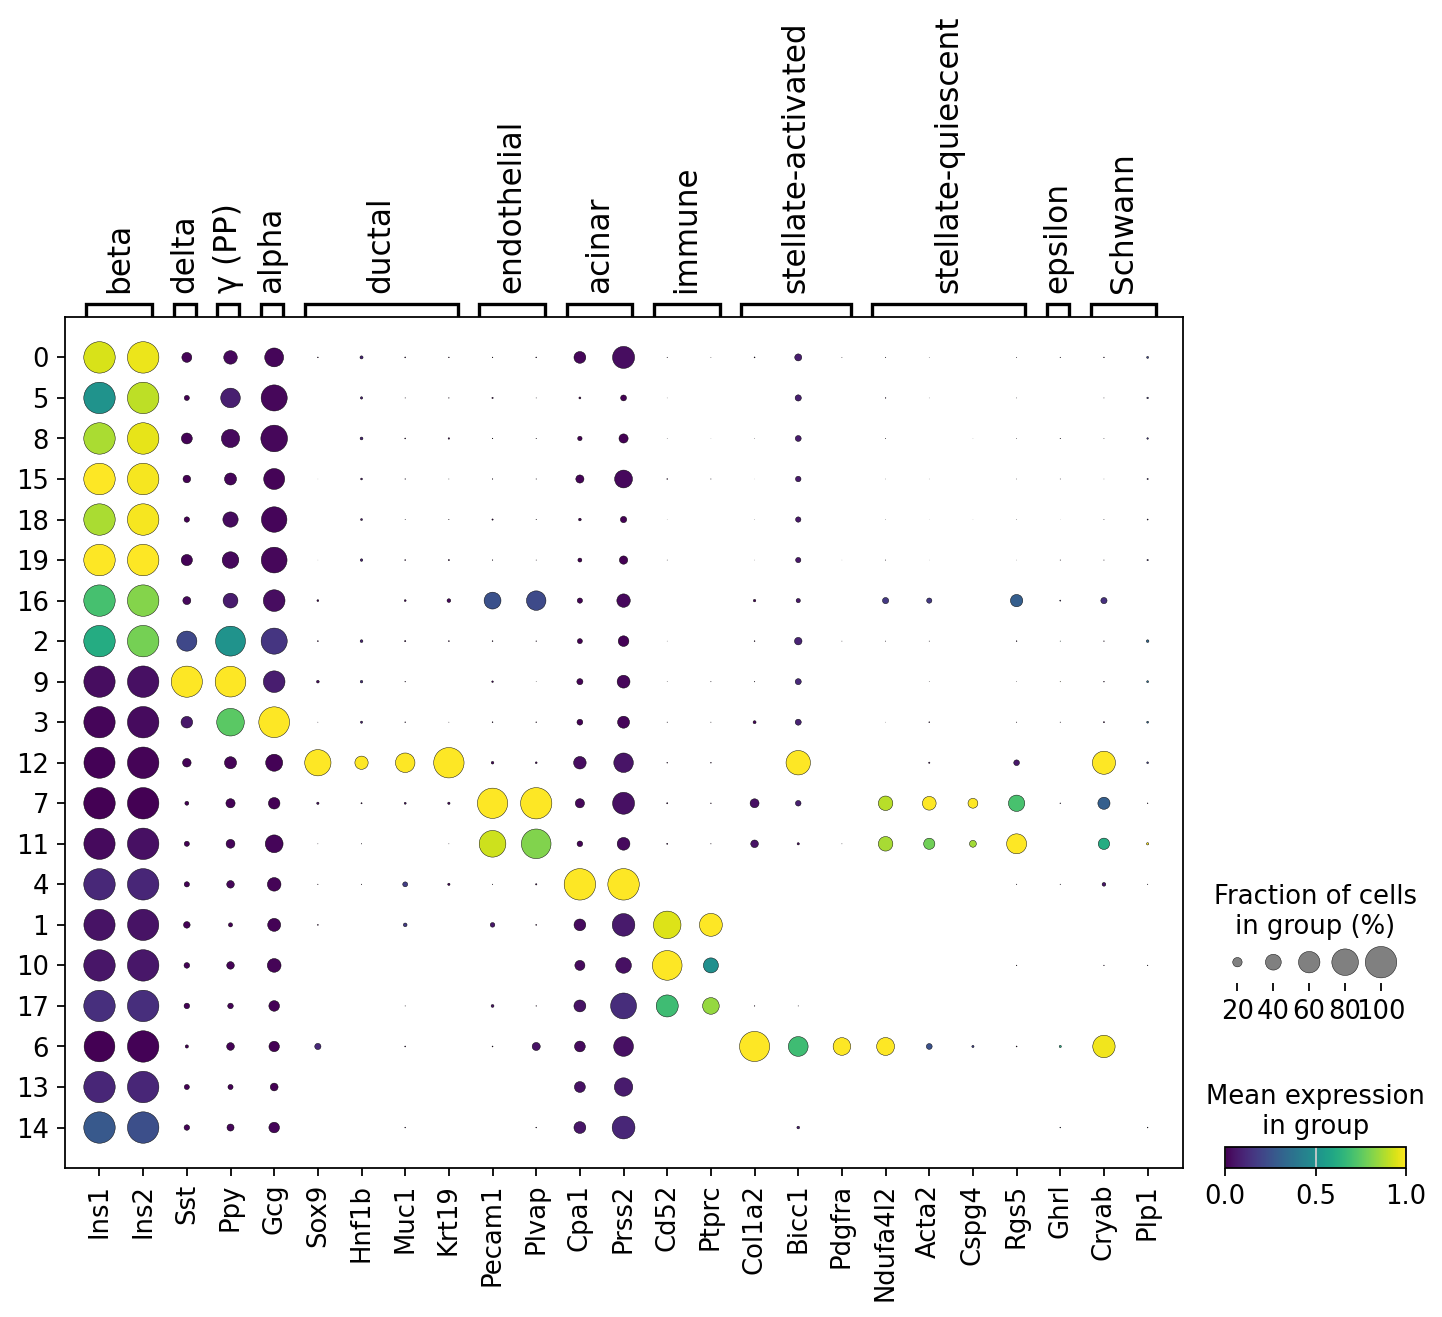

In [234]:
scanpy.pl.dotplot(adata, groupby='clusters', var_names=marker_list, gene_symbols='names', standard_scale='var',
                     cmap='viridis', save='all_exocrine_endocrine.png')

In [235]:
endocrine_clusters = [0, 5, 8, 15, 18, 19, 16, 2, 9, 3]

In [236]:
adata.obs['isEndocrine'] = adata.obs['clusters'].isin(endocrine_clusters)

In [247]:
adata.write('data/all_exocrine_endocrine_processed.h5ad', compression='gzip')